# Learning Outcomes
1. Gentle intro on CV
2. Review on some important notion of image arrays
3. Cropping (one of the data augmentation techniques employed in DL model training)
4. Slit and merge image channels
5. Point operators (basic mathematical operations) / gamma correction
    * Aims: Enhance / Reduce the contrast or illumination of the images.
6. Image blending (add 2 images together)

## setup

In [6]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import show_img

## review: important concepts on image arrays
Images can be broadly categorized as **grayscale** and **color** images.

| Grayscale | Color |
| -:- | -:- |
| matrix (2D array) | 3D array (channels) |
| (h, w) | (h, w, channels) |

In [4]:
img = np.zeros((2, 4), dtype = np.uint8)
print(img)

[[0 0 0 0]
 [0 0 0 0]]


In [5]:
img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_bgr)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [6]:
#change value in array

img[0, 1] = 30    #index of first row of array is 0
img[1, 2] = 100
print(img)

[[  0  30   0   0]
 [  0   0 100   0]]


In [7]:
img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)   #all the values same will only output white, gray or black color
print(img_bgr)

[[[  0   0   0]
  [ 30  30  30]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [100 100 100]
  [  0   0   0]]]


## Accessing pixel elements

In [11]:
img = cv.imread("images/lena.jfif")

a = img[50, 70, 0]
b = img.item(50, 70, 0)
a == b

True

In [12]:
%timeit a = img[50, 70, 0]
%timeit b = img.item(50, 70, 0)

98.3 ns ± 6.08 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
81.2 ns ± 1.99 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


The takeaway the execution time is more or less the same. You are free to use either one of this.

## Numpy slicing (IMPORTANT!!!)

In [13]:
# Extract the top lft region of the image
yc, xc = img.shape[0] // 2, img.shape[1] // 2

topleft = img[:yc, :xc]  # slicing

show_img("topleft", topleft)

In [15]:
# Extract the middle region of the image

middle = img[yc-30:yc+30, xc-30:xc+30]

show_img("middle", middle)

In [16]:
# create a white image
white = np.zeros((200, 200)) + 255
white = np.uint8(white)
show_img("white", white)

## exercise

In [ ]:
# Q2: design pattern

patch = np.zeros((30, 30), dtype=np.uint8)

patch[:10, 10:20] = 255
patch[10:20, :10] = 255
patch[10:20, 20:] = 255
patch[20:, 10:20] = 255

img = np.tile(patch, (3, 3))

show_img("img", img)

In [ ]:
# Q3: extract object of interest
img = cv.imread("images/flower.jfif")

show_img("img", img)

In [ ]:
[i for i in dir(cv) if i.startswitch('EVENT')]

In [ ]:
#1 way:
def select_rect(img, x, y, flags, params):
    """mouseclick callback function"""
    if event == cv.EVENT_LBUTTONDOWN:
        print((x,y))
        cv.circle(img, (x, y), 1, (0, 0, 255), -1)
        cv.imshow("img", img)

img = cv.imread("images/flower.jfif")
cv.imshow("img", img)
cv.setMouseCallback("img", select_rect)
cv.destroyAllWindows()

In [ ]:
#2 way:
bbox = cv.selectROI('flower_region', img)  #window name can set it ourselves

In [ ]:
#3 way:
# top left coordinates: (91, 38) and bottom right coordinates: (170, 120)
flower = img[38:120, 91:170]

show_img("flower", flower)

## Image cropping
In terms of operations, it is identical to slicing.

In [ ]:
img = cv.imread("images/dog.jfif")
img_copy = img.copy()

h, w = img.shape[:2]
n_vertical_grids = 3
n_horizontal_grids = 3

# row sizes and column sizes
M = int(h / n_vertical_grids)
N = int(w / n_horizontal_grids)

tiles = []

for y in range(0, h, M):
    for x in range(0, w, N):
        x1 = x + N
        y1 = y + M
        
        if x1 > w and y1 > h:
            x1 = w - 1
            y1 = h - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)   #green rectangle
            tile = img[y:h, x:w]
            tiles.append(tile)
        
        elif y1 > h:
            y1 = h - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:h, x:x1]
            tiles.append(tile)
        
        elif x1 > w:
            x1 = w - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:y1, x:w]
            tiles.append(tile)
        
        else:
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:y1, x:x1]
            tiles.append(tile)
            
show_img("crop", img_copy)

In [ ]:
show_img("top right", tiles[2])

## Swapping region (exercise 1) - image cropping

In [14]:
#Q1:
img_array = np.zeros_like(img)

yc, xc = img.shape[0] // 2, img.shape[1] // 2

img_array[:yc, :xc] = img[yc:, xc:]
img_array[yc:, xc:] = img[:yc, :xc]
img_array[yc:, :xc] = img[:yc, xc:]
img_array[:yc, xc:] = img[yc:, :xc]

show_img("swap", img_array)

## Split and merge color channels

In [15]:
b, g, r = cv.split(img)
img_merge = cv.merge((b, g, r))

In [16]:
np.array_equal(img, img_merge)

True

In [7]:
import matplotlib.pyplot as plt

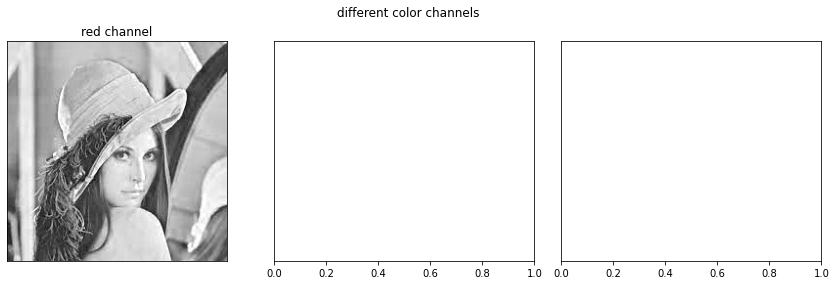

In [18]:
img = cv.imread("images/lena.jfif")

b, g, r = cv.split(img)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fig.suptitle("different color channels")
ax1.imshow(b, cmap=plt.cm.gray)
ax1.set(title="blue channel", xticks=[], yticks=[])
ax1.imshow(g, cmap=plt.cm.gray)
ax1.set(title="green channel", xticks=[], yticks=[])
ax1.imshow(r, cmap=plt.cm.gray)
ax1.set(title="red channel", xticks=[], yticks=[])

plt.tight_layout()
plt.show()

### Exercise no 2: color channels

In [5]:
img = cv.imread("images/dog.jfif")

channels = cv.split(img)

colors = ("blue", "green", "red")

imgs = []

for i, mat in enumerate(channels):
    arr = np.zeros_like(img)
    arr[:, :, i] = mat
    imgs.append(arr)
    
for c, img in zip(colors, imgs):
    cv.imshow(c, img)
    
cv.waitKey(0)
cv.destroyAllWindows()

## Point operators
$$ftrans(\textbf{x}) = \alpha f(\textbf{x}) + \beta$$

In [20]:
np.array([-2, 0, 99, 260], dtype=np.uint8)

array([254,   0,  99,   4], dtype=uint8)

In [23]:
def point_op(img, alpha, beta):
    """point operators. Arguments
    1. Source image
    2. multiplier
    3. constant"""
    img = img.astype(float)
    res = alpha * img + beta
    res = np.clip(res, 0, 255)
    res = np.uint8(res)
    return res

In [26]:
# increase the brightness and contrast of image
img = cv.imread("images/bridge.jfif")

transform = point_op(img, 2, 30)

cv.imshow("original", img)
show_img("transform", transform)

In [25]:
transform2 = point_op(img, 0.8, -20)

show_img("img_transform", transform2)

## Gamma correction
$$O = (\frac{I}{255})^{\gamma}\times255$$

In [28]:
gamma = 1 / 2.2

lookUpTable = np.empty((1, 256), dtype=np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255, 0, 255)
    
img = cv.imread("images/mountains_prop.jpg")
res = cv.LUT(img, lookUpTable)

cv.namedWindow("original", cv.WINDOW_NORMAL)
cv.imshow("original", img)
show_img("gamma corrected", res, adjust=True)

## Image blending (add 2 images)
$$h(\textbf{x}) = \alpha f(\textbf{x}) + (1 - \alpha)g(\textbf{x}) + \beta$$

In [ ]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

alpha = 0.6
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))

res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)

cv.imshow("img1", img)
cv.imshow("img2", img2)
show_img("blending", res)

## Weekly Activity

### Question 1

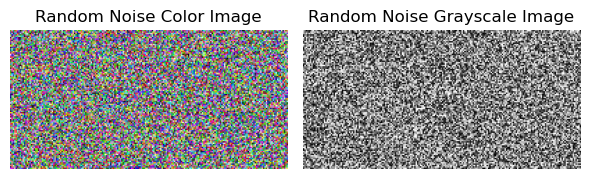

In [6]:
# Set the image dimensions
width = 200
height = 100
total_pixels = width * height

# create random noise for color image
color_img = np.random.rand(height, width, 3)  #3D array

# create random noise for grayscale image
grayscale_img = np.random.rand(height, width)   #2D array

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(color_img)
plt.title('Random Noise Color Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grayscale_img, cmap='gray')
plt.title('Random Noise Grayscale Image')
plt.axis('off')

plt.tight_layout()
plt.show()

### Question 2

In [ ]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    h, w = img.shape[:2]
    # row sizes and column sizes
    M = int(h / num_vertical_grid)
    N = int(w / num_horizontal_grid)
    
    img_copy = img.copy()
    
    for y in range(0, h, M):
        for x in range(0, w, N):
            x1 = x + N
            y1 = y + M

            if x1 > w and y1 > h:
                x1 = w - 1
                y1 = h - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)   #green rectangle
                tile = img[y:h, x:w]
                tiles.append(tile)

            elif y1 > h:
                y1 = h - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:h, x:x1]
                tiles.append(tile)

            elif x1 > w:
                x1 = w - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:y1, x:w]
                tiles.append(tile)

            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:y1, x:x1]
                tiles.append(tile)
    
    
    return img_copy

In [ ]:
img = cv.imread("images/dog.jfif")

num_horizontal_grid = 4
num_vertical_grid = 3

line_color = (0, 255, 0)

img_output = crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)

cv.imshow("Output", img_output)
cv.waitKey(0)
cv.destroyAllWindows()

### Question 3

In [18]:
def blend_images(img, img2, alpha):
    return cv.addWeighted(img, alpha, img2, 1 - alpha, 0)

img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

# Resize the images to have the same dimensions (optional, depending on image sizes)
img = cv.resize(img, (400, 400))
img2 = cv.resize(img2, (400, 400))

# Define alpha values for blending
alpha_values = [i / 10.0 for i in range(11)]  # Alpha values: 0.0 to 1.0 in steps of 0.1

# Create and display the image sequences with different alpha values
for alpha in alpha_values:
    blended_image = blend_images(img, img2, alpha)
    cv.imshow("Blended Image", blended_image)
    cv.waitKey(500)  # Show each blended image for 500 milliseconds (0.5 seconds)

        
cv.destroyAllWindows()

### Question 4

In [4]:
img = cv.imread("images/travel_hd.jpg")

watermark = "CV lab UCCC2513"
font = cv.FONT_HERSHEY_SIMPLEX
font_scale = 0.7
font_thickness = 2
text_size, _ = cv.getTextSize("CV lab UCCC2513", font, font_scale, font_thickness)
text_width, text_height = text_size

padding = 10
watermark_pos = (img.shape[0] - text_width - padding, img.shape[1] - padding)

img_copy = img.copy()
cv.putText(img_copy, watermark, watermark_pos, font, font_scale, 255, font_thickness)


# Save the watermarked image
output_path = "watermarked_travel_hd.jpg"
cv.imwrite(output_path, img_copy)

True

In [17]:
image_path = "images/travel_hd.jpg"
image = cv.imread(image_path)

watermark_text = "CV lab UCCC2513"
font = cv.FONT_HERSHEY_SIMPLEX
font_scale = 4
font_thickness = 2
text_size, _ = cv.getTextSize(watermark_text, font, font_scale, font_thickness)
text_width, text_height = text_size

# Calculate the position to place the watermark (bottom-left corner)
padding = 30
watermark_pos = (padding, image.shape[0] - padding)

# Add the watermark to the image
watermarked_image = image.copy()
cv.putText(watermarked_image, watermark_text, watermark_pos, font, font_scale, (255, 255, 255), font_thickness, cv.LINE_AA)

# Save the watermarked image
output_path = "watermarked_travel_hd.jpg"
cv.imwrite(output_path, watermarked_image)

print("Watermark applied and saved successfully.")


Watermark applied and saved successfully.
